In [5]:
import numpy as np





def calc_lcoe(capFactor,capex,varOM,fixedOM,transmission_cost,
              rD,rL,rT,
              loan_term,lifetime,
              stor_cost=0,stor_hours=0,rec_sales=0,
              ITC=0,PTC=0,depR=0,cap_disc=0):

    installed_cap = 1000    

    years = np.linspace(1,lifetime,(lifetime))

    expenditures = []
    discounts = []
    e_gen = []
    loan_balance = []

    # def lfc(capex,r,term):
    #     return capex*r /(1.0-np.power(1.0+r,-term))
    init_balance = capex*installed_cap+stor_cost*installed_cap*stor_hours*capFactor
    
    init_balance = init_balance * (1.0 - ITC)
    
    cap_payments = init_balance*(rL*(1.0+rL)**(loan_term)/((1+rL)**(loan_term) - 1))
    dep = 1.0/(lifetime)
    bank_payments = []
    balance = init_balance
    for i,t in enumerate(years):

        # Pay down the mortgage
        balance *= (1.0 + rL)
        cap_payments = min(cap_payments,balance)
        balance -= cap_payments
        balance = max(balance,0.0)
        bank_payments.append(cap_payments)
        # Calculate the annual gneration
        gen = capFactor*installed_cap*(365*24)

        gamma = 1.0/(1+rD)**t
        tax_factor = - rT*dep*gamma*init_balance/(1.0-rT)
        # Sum of the expenses for the year
        expenses = cap_payments*gamma/(1.0-rT)
        expenses += varOM*gen*gamma + fixedOM*installed_cap*gamma 
        expenses += -rec_sales*gen*gamma + tax_factor - gen*PTC*gamma 
        expenses += transmission_cost*gen

        # Append the discounted expenses
        expenditures.append(expenses)

        # Append the discounted generation
        e_gen.append(gen*gamma*1.0e-3)
        # print(init_balance)

    # print(np.sum(expenditures)/np.sum(e_gen))
    lcoe = np.sum(expenditures)/np.sum(e_gen)
    return lcoe

    # import matplotlib.pyplot as plt

    # plt.plot(expenditures)
    # plt.figure()
    # plt.plot(e_gen)
    # plt.figure()
    # plt.plot(bank_payments)




88.64240367980146


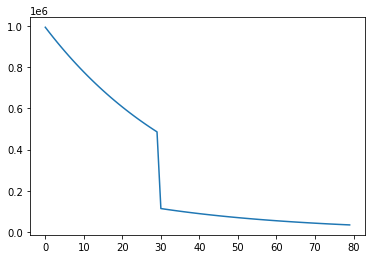

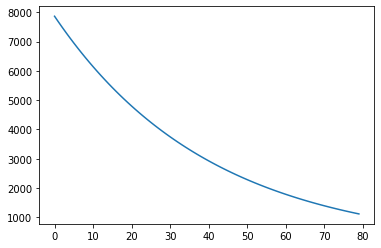

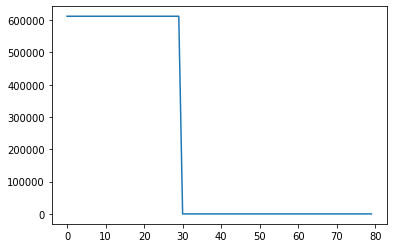

In [14]:
installed_cap = 1000
capacity_factor = 0.92
lifetime = 80
loan_term = 30
discount_rate = 2.0/lifetime
loan_interest = 0.03
tax_rate = 0.21

r = discount_rate

capex = 12000 # $/kW
varOM = 3.02-3 # $/kWh
fixedOM = 122.26 # $/kW-y
transmission_cost = 0.99e-3 # $/kWh

PTC = 0.0
ITC = 0.0
rec_sales = 0.0

# Storage
stor_cost = 400 # $/kWh
stor_hours = 0  # kWh/kW(installed capacity)


calc_lcoe(capacity_factor,capex,varOM,fixedOM,transmission_cost,discount_rate,loan_interest,tax_rate,loan_term, lifetime
)